# Exploration: beds

This notebook contains the availability of beds. ICU beds are the most relevant for this analysis, since they are important to keep health system working well.

**The meaning of some words**

* MSP *(Ministerio de Salud Pública)* -> Public Health System
* RPIS -> Affiliated programs for workers, army, etc. It's a combination of public and private.
* RPC -> Private clinics and hospitals.

In [ ]:
# %load_ext autoreload
# %autoreload 2

In [ ]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_beds = pd.read_csv('/work/covid-19-EC-provinces/data/raw/beds_raw.csv')

In [ ]:
df_beds.head()

,informacion,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020,19/03/2020,20/03/2020,21/03/2020,...,07/12/2021,08/12/2021,09/12/2021,10/12/2021,11/12/2021,12/12/2021,13/12/2021,14/12/2021,15/12/2021,16/12/2021
0,(MSP) Hospitalización Porcentaje Ocupadas,0,0,0,0,0,0,0,0,0,...,18,17,21,21,20,21,19,21,21,21
1,(MSP) Hospitalización Lista Espera,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,(MSP) Hospitalización Camas Asignadas,0,0,0,0,0,0,0,0,0,...,543,550,546,545,546,545,544,549,553,548
3,(MSP) Hospitalización Camas Ocupadas,0,0,0,0,0,0,0,0,0,...,97,94,117,114,107,115,102,116,117,119
4,(MSP) Cuidados Intermedios Porcentaje Ocupadas,0,0,0,0,0,0,0,0,0,...,36,36,38,36,38,38,56,42,33,31


In [ ]:
headers = df_beds.T.reset_index().iloc[0]

In [ ]:
beds = df_beds.T.reset_index().drop(0)

In [ ]:
beds.columns = headers

In [ ]:
beds.rename(columns={'informacion': 'date'}, inplace=True)

In [ ]:
beds

,date,(MSP) Hospitalización Porcentaje Ocupadas,(MSP) Hospitalización Lista Espera,(MSP) Hospitalización Camas Asignadas,(MSP) Hospitalización Camas Ocupadas,(MSP) Cuidados Intermedios Porcentaje Ocupadas,(MSP) Cuidados Intermedios Lista Espera,(MSP) Cuidados Intermedios Camas Asignadas,(MSP) Cuidados Intermedios Camas Ocupadas,(MSP) UCI Porcentaje Ocupadas,...,(RPC) Hospitalización Camas Asignadas,(RPC) Hospitalización Camas Ocupadas,(RPC) Cuidados Intermedios Porcentaje Ocupadas,(RPC) Cuidados Intermedios Lista Espera,(RPC) Cuidados Intermedios Camas Asignadas,(RPC) Cuidados Intermedios Camas Ocupadas,(RPC) UCI Porcentaje Ocupadas,(RPC) UCI Lista Espera,(RPC) UCI Camas Asignadas,(RPC) UCI Camas Ocupadas
1,13/03/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14/03/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15/03/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16/03/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,17/03/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,12/12/2021,21,0,545,115,38,1,55,21,53,...,365,78,0,0,19,0,22,0,135,30
641,13/12/2021,19,0,544,102,56,1,55,31,55,...,370,77,0,0,19,0,22,0,135,30
642,14/12/2021,21,0,549,116,42,1,55,23,55,...,373,78,0,0,19,0,25,0,134,33
643,15/12/2021,21,0,553,117,33,1,55,18,52,...,377,84,0,0,20,0,22,0,140,31


In [ ]:
beds.shape

(644, 37)

In [ ]:
beds.dtypes

0
date                                               object
(MSP) Hospitalización Porcentaje Ocupadas          object
(MSP) Hospitalización Lista Espera                 object
(MSP) Hospitalización Camas Asignadas              object
(MSP) Hospitalización Camas Ocupadas               object
(MSP) Cuidados Intermedios Porcentaje Ocupadas     object
(MSP) Cuidados Intermedios Lista Espera            object
(MSP) Cuidados Intermedios Camas Asignadas         object
(MSP) Cuidados Intermedios Camas Ocupadas          object
(MSP) UCI Porcentaje Ocupadas                      object
(MSP) UCI Lista Espera                             object
(MSP) UCI Camas Asignadas                          object
(MSP) UCI Camas Ocupadas                           object
(RPIS) Hospitalización Porcentaje Ocupadas         object
(RPIS) Hospitalización Lista Espera                object
(RPIS) Hospitalización Camas Asignadas             object
(RPIS) Hospitalización Camas Ocupadas              object
(RPIS) Cuida

In [ ]:
beds.date = pd.to_datetime(beds.date, dayfirst=True)

In [ ]:
beds['year'] = beds.date.dt.year 
beds['month'] = beds.date.dt.month
beds['quarter'] = beds.date.dt.quarter 
beds['day_of_week'] = beds.date.dt.day_of_week 

In [ ]:
for i in beds.columns[1:-4]:
    beds[i] = beds[i].astype('int64')

In [ ]:
sns.set_theme()

## Percentajes

I stated that ICUs are the most relevant type of beds. But I check to the rest of the data to better understand the context.

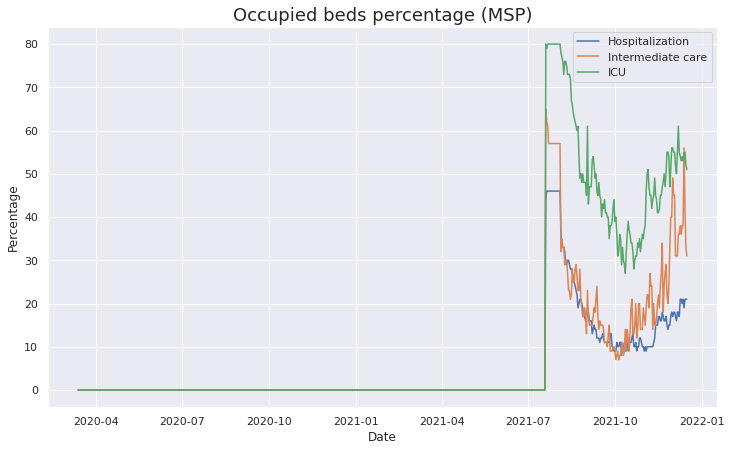

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(beds['date'], beds['(MSP) Hospitalización Porcentaje Ocupadas'])
plt.plot(beds['date'], beds['(MSP) Cuidados Intermedios Porcentaje Ocupadas'])
plt.plot(beds['date'], beds['(MSP) UCI Porcentaje Ocupadas'])
plt.title('Occupied beds percentage (MSP)', size=18)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.legend(['Hospitalization', 'Intermediate care', 'ICU'])
plt.show()

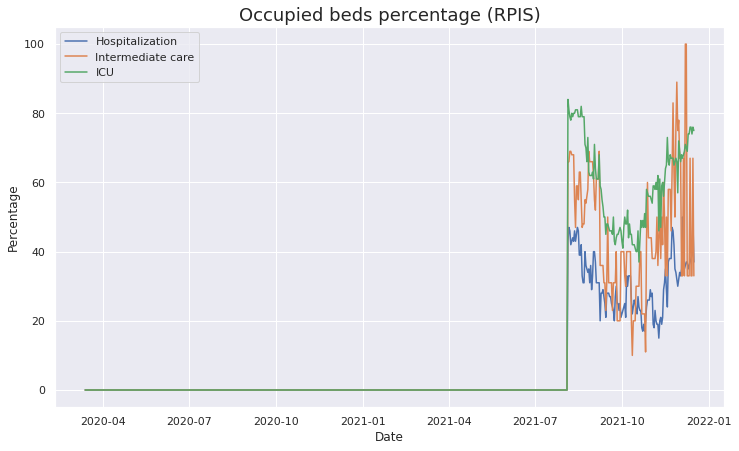

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(beds['date'], beds['(RPIS) Hospitalización Porcentaje Ocupadas'])
plt.plot(beds['date'], beds['(RPIS) Cuidados Intermedios Porcentaje Ocupadas'])
plt.plot(beds['date'], beds['(RPIS) UCI Porcentaje Ocupadas'])
plt.title('Occupied beds percentage (RPIS)', size=18)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.legend(['Hospitalization', 'Intermediate care', 'ICU'])
plt.show()

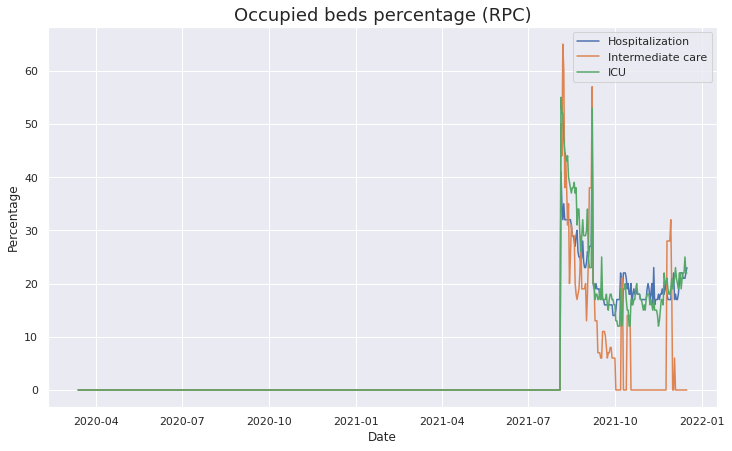

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(beds['date'], beds['(RPC) Hospitalización Porcentaje Ocupadas'])
plt.plot(beds['date'], beds['(RPC) Cuidados Intermedios Porcentaje Ocupadas'])
plt.plot(beds['date'], beds['(RPC) UCI Porcentaje Ocupadas'])
plt.title('Occupied beds percentage (RPC)', size=18)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.legend(['Hospitalization', 'Intermediate care', 'ICU'])
plt.show()

In [ ]:
beds[['(MSP) Hospitalización Porcentaje Ocupadas', '(MSP) Cuidados Intermedios Porcentaje Ocupadas', '(MSP) UCI Porcentaje Ocupadas', 'quarter', 'year']].query('quarter >= 3 and year == 2021').drop(columns=['year', 'quarter']).corr()

,(MSP) Hospitalización Porcentaje Ocupadas,(MSP) Cuidados Intermedios Porcentaje Ocupadas,(MSP) UCI Porcentaje Ocupadas
0,,,
(MSP) Hospitalización Porcentaje Ocupadas,1.000000,0.890580,0.902067
(MSP) Cuidados Intermedios Porcentaje Ocupadas,0.890580,1.000000,0.836705
(MSP) UCI Porcentaje Ocupadas,0.902067,0.836705,1.000000


<AxesSubplot:xlabel='0', ylabel='0'>

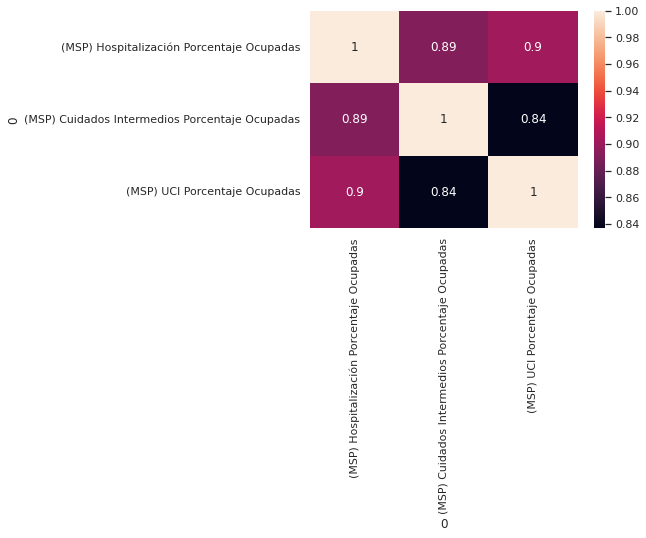

In [ ]:
sns.heatmap(beds[['(MSP) Hospitalización Porcentaje Ocupadas', 
'(MSP) Cuidados Intermedios Porcentaje Ocupadas', 
'(MSP) UCI Porcentaje Ocupadas', 
'quarter', 
'year']].query('quarter >= 3 and year == 2021').drop(columns=['year', 'quarter']).corr(), annot=True)

<AxesSubplot:xlabel='0', ylabel='0'>

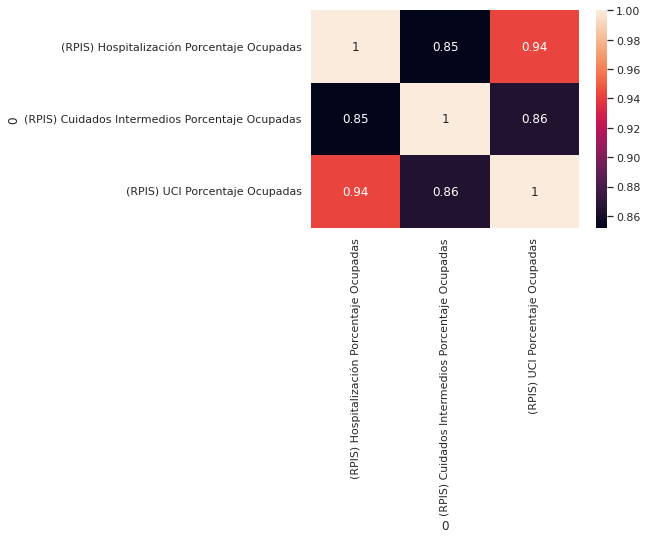

In [ ]:
sns.heatmap(beds[['(RPIS) Hospitalización Porcentaje Ocupadas', 
'(RPIS) Cuidados Intermedios Porcentaje Ocupadas', 
'(RPIS) UCI Porcentaje Ocupadas', 
'quarter', 
'year']].query('quarter >= 3 and year == 2021').drop(columns=['year', 'quarter']).corr(), annot=True)

In [ ]:
(beds[['(RPC) Hospitalización Porcentaje Ocupadas', 
'(RPC) Cuidados Intermedios Porcentaje Ocupadas', 
'(RPC) UCI Porcentaje Ocupadas', 
'quarter', 
'year']].query('quarter >= 3 and year == 2021').drop(columns=['year', 'quarter'])).dtypes

0
(RPC) Hospitalización Porcentaje Ocupadas         int64
(RPC) Cuidados Intermedios Porcentaje Ocupadas    int64
(RPC) UCI Porcentaje Ocupadas                     int64
dtype: object

<AxesSubplot:xlabel='0', ylabel='0'>

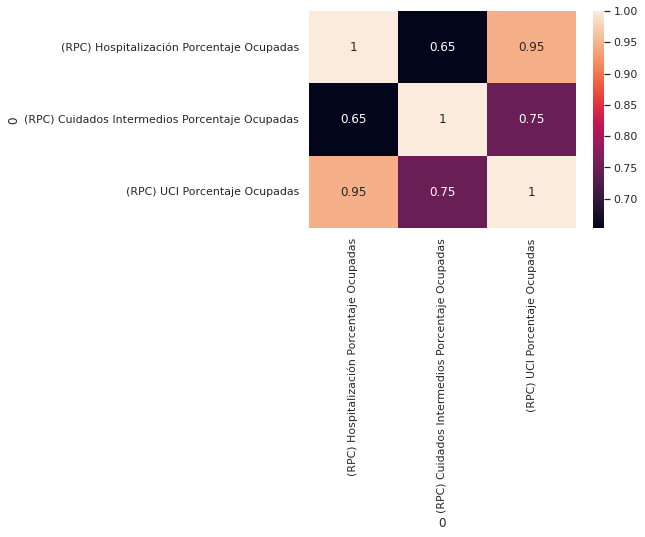

In [ ]:
sns.heatmap(beds[['(RPC) Hospitalización Porcentaje Ocupadas', 
'(RPC) Cuidados Intermedios Porcentaje Ocupadas', 
'(RPC) UCI Porcentaje Ocupadas', 
'quarter', 
'year']].query('quarter >= 3 and year == 2021').drop(columns=['year', 'quarter']).corr(), annot=True)

## MSP

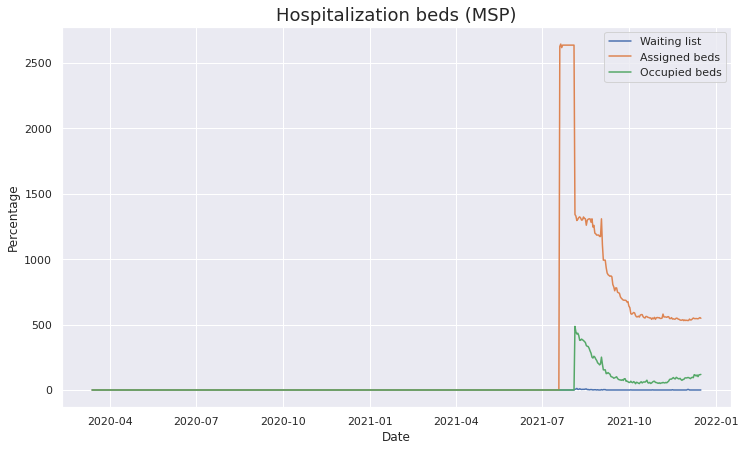

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(beds['date'], beds['(MSP) Hospitalización Lista Espera'])
plt.plot(beds['date'], beds['(MSP) Hospitalización Camas Asignadas'])
plt.plot(beds['date'], beds['(MSP) Hospitalización Camas Ocupadas'])
plt.title('Hospitalization beds (MSP)', size=18)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.legend(['Waiting list', 'Assigned beds', 'Occupied beds'])
plt.show()

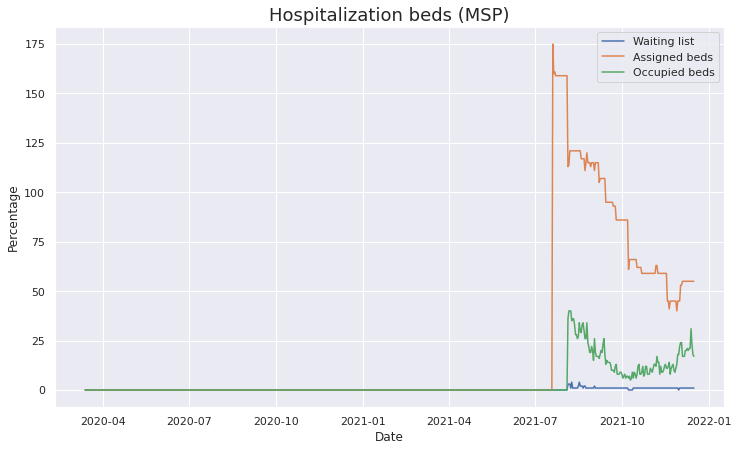

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(beds['date'], beds['(MSP) Cuidados Intermedios Lista Espera'])
plt.plot(beds['date'], beds['(MSP) Cuidados Intermedios Camas Asignadas'])
plt.plot(beds['date'], beds['(MSP) Cuidados Intermedios Camas Ocupadas'])
plt.title('Hospitalization beds (MSP)', size=18)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.legend(['Waiting list', 'Assigned beds', 'Occupied beds'])
plt.show()

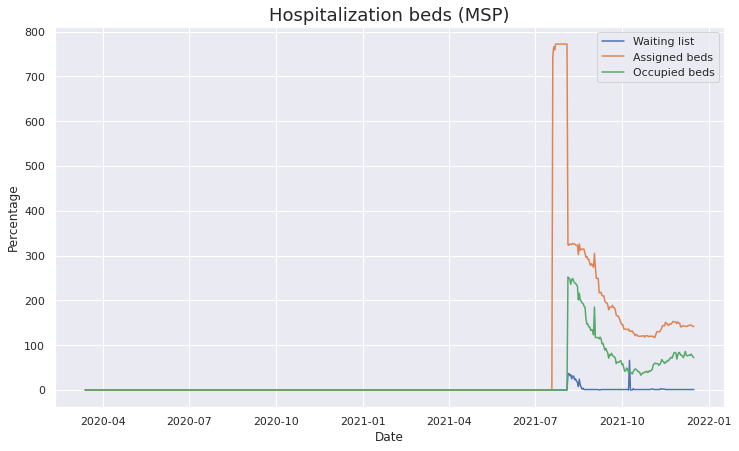

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(beds['date'], beds['(MSP) UCI Lista Espera'])
plt.plot(beds['date'], beds['(MSP) UCI Camas Asignadas'])
plt.plot(beds['date'], beds['(MSP) UCI Camas Ocupadas'])
plt.title('Hospitalization beds (MSP)', size=18)
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.legend(['Waiting list', 'Assigned beds', 'Occupied beds'])
plt.show()

In [ ]:
beds.iloc[[538]]

,date,(MSP) Hospitalización Porcentaje Ocupadas,(MSP) Hospitalización Lista Espera,(MSP) Hospitalización Camas Asignadas,(MSP) Hospitalización Camas Ocupadas,(MSP) Cuidados Intermedios Porcentaje Ocupadas,(MSP) Cuidados Intermedios Lista Espera,(MSP) Cuidados Intermedios Camas Asignadas,(MSP) Cuidados Intermedios Camas Ocupadas,(MSP) UCI Porcentaje Ocupadas,...,(RPC) Cuidados Intermedios Camas Asignadas,(RPC) Cuidados Intermedios Camas Ocupadas,(RPC) UCI Porcentaje Ocupadas,(RPC) UCI Lista Espera,(RPC) UCI Camas Asignadas,(RPC) UCI Camas Ocupadas,year,month,quarter,day_of_week
539,2021-09-02,19,3,1308,251,23,2,111,26,61,...,17,3,34,3,160,54,2021,9,3,3


## Unifying ICUs

Continuing with the exploration, it's time to unify ICUs for MSP, RCP and RPIS. Since, the values before July 2021 are 0, I decided to drop them out. It seems there's a mistake in the record of the data. So I do this in order to reduce bias.

In [ ]:
icu = beds.query('quarter >= 3 and year == 2021')[['date', '(MSP) UCI Porcentaje Ocupadas', '(RPIS) UCI Porcentaje Ocupadas', '(RPC) UCI Porcentaje Ocupadas']]

In [ ]:
icu.describe()

,(MSP) UCI Porcentaje Ocupadas,(RPIS) UCI Porcentaje Ocupadas,(RPC) UCI Porcentaje Ocupadas
count,169.000000,169.000000,169.000000
mean,45.248521,47.520710,17.692308
std,21.563522,26.835941,12.529489
min,0.000000,0.000000,0.000000
25%,36.000000,42.000000,13.000000
50%,46.000000,55.000000,17.000000
75%,55.000000,67.000000,22.000000
max,80.000000,84.000000,55.000000


Let's see how these variables correlate.

In [ ]:
icu.corr()

,(MSP) UCI Porcentaje Ocupadas,(RPIS) UCI Porcentaje Ocupadas,(RPC) UCI Porcentaje Ocupadas
0,,,
(MSP) UCI Porcentaje Ocupadas,1.000000,0.366529,0.427293
(RPIS) UCI Porcentaje Ocupadas,0.366529,1.000000,0.863913
(RPC) UCI Porcentaje Ocupadas,0.427293,0.863913,1.000000


<AxesSubplot:xlabel='0', ylabel='0'>

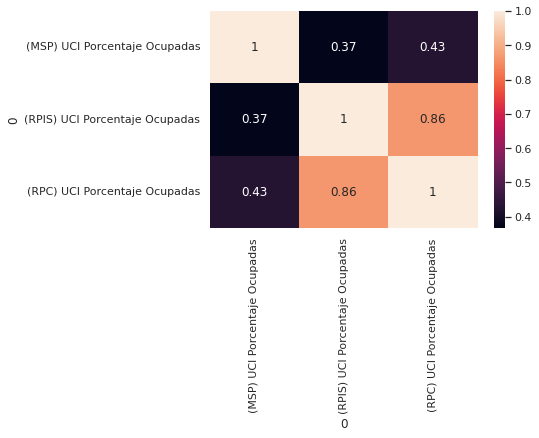

In [ ]:
sns.heatmap(icu.corr(), annot=True)

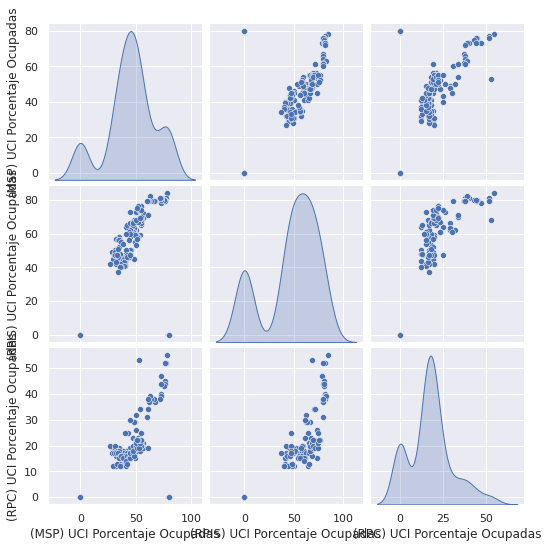

In [ ]:
sns.pairplot(icu, diag_kind='kde')

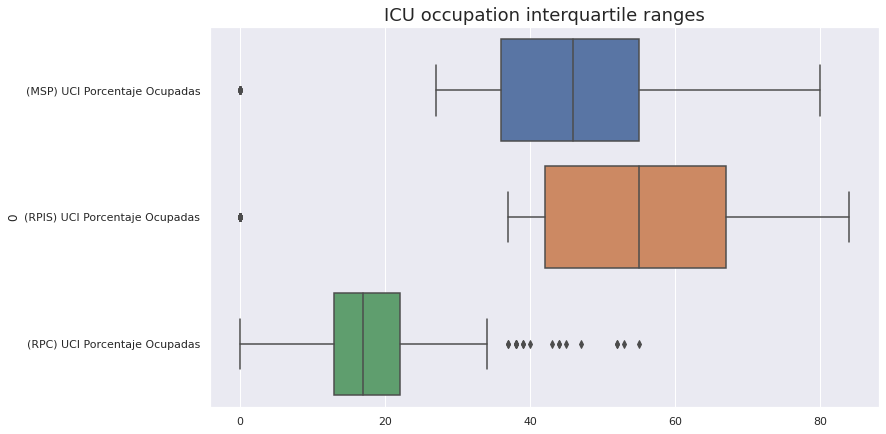

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=icu, orient='h', ax=ax)
plt.title('ICU occupation interquartile ranges', size=18)
fig.show()

The previos visualizations shows the interquartile range of ICU occupation per day. It tells that:

* RPIS are more occupied than the rest and also are similar to MSP.
* RPC are the least occupied and also the data here is less spread.

The reason may be that people tend to go to public services first due to high costs in the private sector.

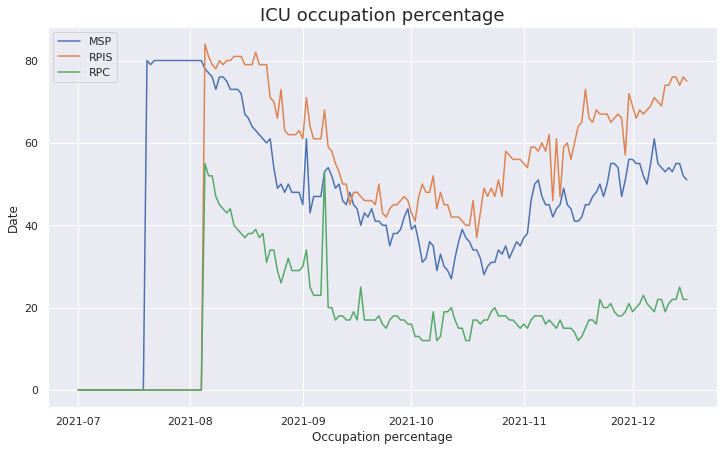

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(icu['date'], icu['(MSP) UCI Porcentaje Ocupadas'])
plt.plot(icu['date'], icu['(RPIS) UCI Porcentaje Ocupadas'])
plt.plot(icu['date'], icu['(RPC) UCI Porcentaje Ocupadas'])
plt.title('ICU occupation percentage', size=18)
plt.xlabel('Occupation percentage')
plt.ylabel('Date')
plt.legend(['MSP', 'RPIS', 'RPC'])
fig.show()

The previous plot corroborates the visualizations of the boxplot.

### Export data

In [ ]:
icu.to_csv('/work/covid-19-EC-provinces/data/interim/icu.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7294ef23-3287-47ac-a12f-ba892bffdf3b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>